In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from warnings import filterwarnings

1 : - Data Exploration And Preprocessing

In [31]:
df = pd.read_csv("E:\MachineLearing_SKillCrafters\Projects_ML\Electric_Vehical_Project_ML\\Electric_Vehicle_Population_Data.csv")
df.shape


(112634, 17)

In [32]:
df['Base MSRP'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
112629    0
112630    0
112631    0
112632    0
112633    0
Name: Base MSRP, Length: 112634, dtype: int64>

In [33]:
df.tail(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007
112633,YV4BR0CL8N,King,Covington,WA,98042,2022,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,47.0,194673692,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032005


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [35]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [36]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [37]:
df['Model'].fillna(df['Model'].mode()[0], inplace=True)
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0], inplace=True)
df['Legislative District'].fillna(df['Legislative District'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20184\3544384203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model'].fillna(df['Model'].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20184\3544384203.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [38]:
df.dropna(subset=['Vehicle Location'], inplace=True)

2 : - Exploratory Data Analysis

In [39]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,34.0,198968248,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32003005702


In [40]:
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

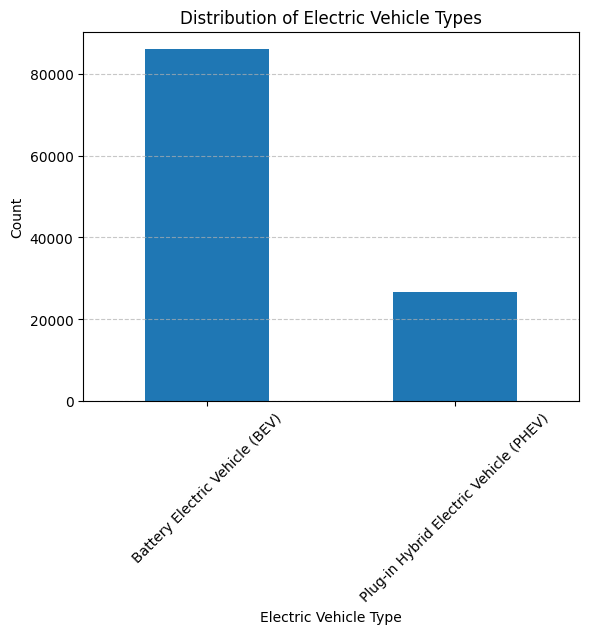

In [41]:
ev_type_counts = df['Electric Vehicle Type'].value_counts()
plt.Figure(figsize=(10, 6))
ev_type_counts.plot(kind='bar')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_20184\3640552099.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Vehicle Type')


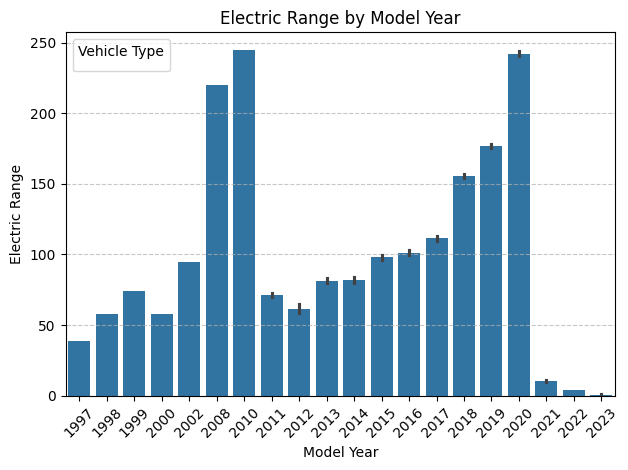

In [42]:
sns.barplot(x=df['Model Year'],y = df['Electric Range'],data=df)
plt.title('Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

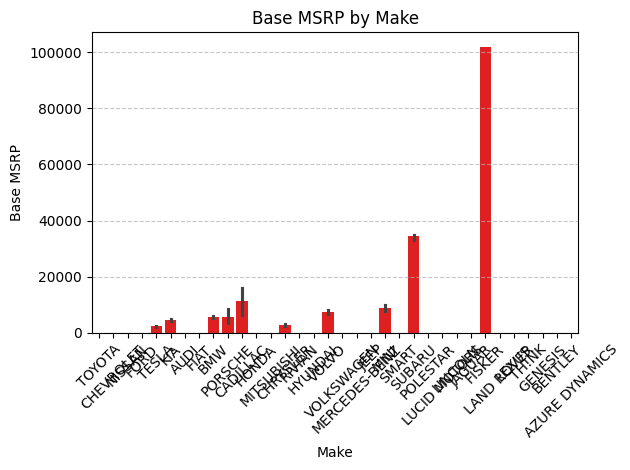

In [43]:
plt.Figure(figsize=(10, 6))
sns.barplot(x=df['Make'],y=df['Base MSRP'],color='red',data=df)
plt.title('Base MSRP by Make')
plt.xlabel('Make')
plt.ylabel('Base MSRP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

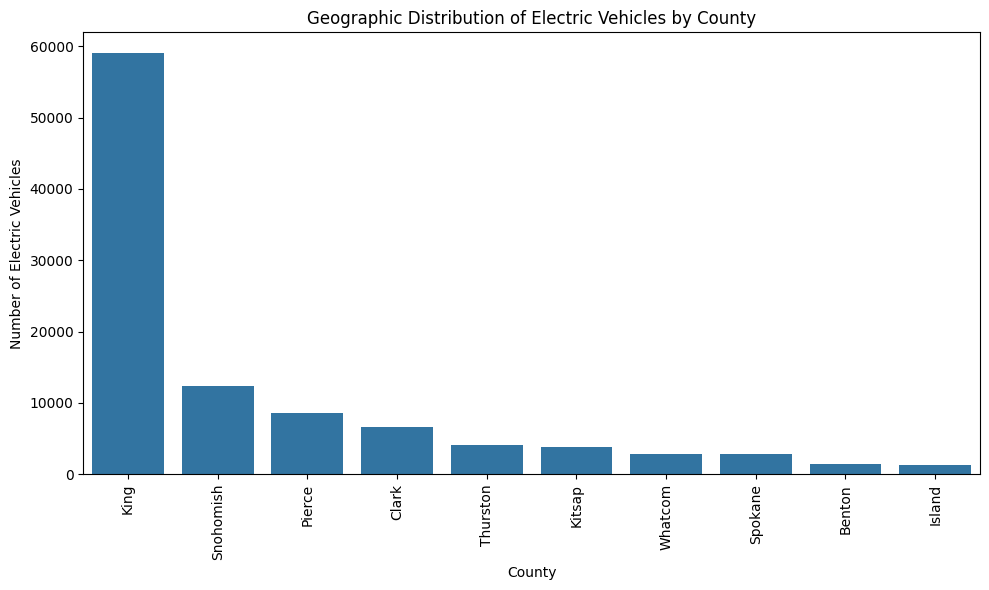

In [44]:
plt.figure(figsize=(10, 6))
county_counts = df['County'].value_counts().head(10)
sns.barplot(x=county_counts.index, y=county_counts.values)
plt.title('Geographic Distribution of Electric Vehicles by County')
plt.xlabel('County')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3 :- Feature Engineering

In [45]:
features = ['Model Year', 'Make', 'Electric Vehicle Type', 'Base MSRP']
df = df[features + ['Electric Range']]

In [46]:
df = pd.get_dummies(df,drop_first=True)

Step 4 :- Model Selection

In [47]:
x=df.drop('Electric Range',axis=1)
y=df['Electric Range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Lr Score:",lr.score(x_test, y_test),lr.score(x_train, y_train))
print("Predication:",lr.predict(x_test))
print("MSE:",mean_squared_error(y_test,lr.predict(x_test)))
print("MAE:", mean_absolute_error(y_test, lr.predict(x_test)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))



Lr Score: 0.3388331073782942 0.33307995046580186
Predication: [80.5276341  80.5276341  80.5276341  ... 30.3206443  75.26511815
 98.72311015]
MSE: 6957.945693712068
MAE: 69.41470482878381
RMSE: 83.41430149388094


In [49]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
print("DT Score:", dt.score(x_test, y_test), dt.score(x_train, y_train))
print("Predication:",dt.predict(x_test))
print("MSE:",mean_squared_error(y_test,dt.predict(x_test)))
print("RMSE:", root_mean_squared_error(y_test, dt.predict(x_test)))
print("MAE:", mean_absolute_error(y_test, dt.predict(x_test)))
print("R2_Score: ",r2_score(y_test,dt.predict(x_test)))

DT Score: 0.9865729245989544 0.9868373500989589
Predication: [0. 0. 0. ... 0. 0. 0.]
MSE: 141.30299400715293
RMSE: 11.887093589568181
MAE: 3.90125351885913
R2_Score:  0.9865729245989544


In [50]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
print("RF Score:", rf.score(x_test, y_test), rf.score(x_train, y_train))
print("Predication:", rf.predict(x_test))
print("MSE:",mean_squared_error(y_test, rf.predict(x_test)))
print("RMSE:", root_mean_squared_error(y_test, rf.predict(x_test)))
print("MAE:", mean_absolute_error(y_test, rf.predict(x_test)))
print("R2_Score: ", r2_score(y_test, rf.predict(x_test)))



RF Score: 0.9865772106266074 0.9868367805696109
Predication: [0. 0. 0. ... 0. 0. 0.]
MSE: 141.257888984526
RMSE: 11.885196211444134
MAE: 3.9030290211145933
R2_Score:  0.9865772106266074


In [51]:
from sklearn.metrics import root_mean_squared_error,r2_score
lg = LogisticRegression()
lg.fit(x_train, y_train)
print("lg Score:", lg.score(x_test, y_test), lg.score(x_train, y_train))
print("Predication:", lg.predict(x_test))
print("MSE:", mean_squared_error(y_test, lg.predict(x_test)))
print("MAE:", mean_absolute_error(y_test, lg.predict(x_test)))
print("RMSE:", root_mean_squared_error(y_test, lg.predict(x_test)))
print("R2_Score: ", r2_score(y_test, lg.predict(x_test)))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lg Score: 0.36169079122635645 0.36169079122635645
Predication: [0 0 0 ... 0 0 0]
MSE: 18025.547953112513
MAE: 87.0227777284433
RMSE: 134.2592564894969
R2_Score:  -0.712846873572643


In [52]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
print("KNN Score:", knn.score(x_test, y_test), knn.score(x_train, y_train))
print("Predication:", knn.predict(x_test))
print("MSE:", mean_squared_error(y_test, knn.predict(x_test)))
print("RMSE:", root_mean_squared_error(y_test, knn.predict(x_test)))
print("MAE:", mean_absolute_error(y_test, knn.predict(x_test)))
print("R2_Score: ", r2_score(y_test, knn.predict(x_test)))
       

KNN Score: 0.9831878609788602 0.9834971116012876
Predication: [0. 0. 0. ... 0. 0. 0.]
MSE: 176.92650919101322
RMSE: 13.301372455164664
MAE: 3.750333007725779
R2_Score:  0.9831878609788602


In [53]:
results = pd.DataFrame([
{
    'Model':"Linner Regression",
    'Train Score':lr.score(x_train, y_train),
    'Test Score':lr.score(x_test, y_test),
    'MSE':mean_squared_error(y_test, lr.predict(x_test)),
    'RMSE':root_mean_squared_error(y_test, lr.predict(x_test)),
    'MAE':mean_absolute_error(y_test, lr.predict(x_test)),
    'R2_Score':r2_score(y_test, lr.predict(x_test)),
    
},
    {
    'Model':"Decision Tree",
    'Train Score':dt.score(x_train, y_train),
    'Test Score':dt.score(x_test, y_test),
    'MSE':mean_squared_error(y_test, dt.predict(x_test)),
    'RMSE':root_mean_squared_error(y_test, dt.predict(x_test)),
    'MAE':mean_absolute_error(y_test, dt.predict(x_test)),
    'R2_Score':r2_score(y_test, dt.predict(x_test)),
    
},
    {
    'Model':"Random Forest",
    'Train Score':rf.score(x_train, y_train),
    'Test Score':rf.score(x_test, y_test),
    'MSE':mean_squared_error(y_test, rf.predict(x_test)),
    'RMSE':root_mean_squared_error(y_test, rf.predict(x_test)),
    'MAE':mean_absolute_error(y_test, rf.predict(x_test)),
    'R2_Score':r2_score(y_test, rf.predict(x_test)),
   
},
    {
    'Model':"lg",
    'Train Score':lg.score(x_train, y_train),
    'Test Score':lg.score(x_test, y_test),
    'MSE':mean_squared_error(y_test, lg.predict(x_test)),
    'RMSE':root_mean_squared_error(y_test, lg.predict(x_test)),
    'MAE':mean_absolute_error(y_test, lg.predict(x_test)),
    'R2_Score':r2_score(y_test, lg.predict(x_test)),
},
    {
    'Model':"KNN",
    'Train Score':knn.score(x_train, y_train),
    'Test Score':knn.score(x_test, y_test),
    'MSE':mean_squared_error(y_test, knn.predict(x_test)),
    'RMSE':root_mean_squared_error(y_test, knn.predict(x_test)),
    'MAE':mean_absolute_error(y_test, knn.predict(x_test)),
    'R2_Score':r2_score(y_test, knn.predict(x_test)),
}
])
results

,Model,Train Score,Test Score,MSE,RMSE,MAE,R2_Score
0,Linner Regression,0.333080,0.338833,6957.945694,83.414301,69.414705,0.338833
1,Decision Tree,0.986837,0.986573,141.302994,11.887094,3.901254,0.986573
2,Random Forest,0.986837,0.986577,141.257889,11.885196,3.903029,0.986577
3,lg,0.361691,0.361691,18025.547953,134.259256,87.022778,-0.712847
4,KNN,0.983497,0.983188,176.926509,13.301372,3.750333,0.983188


In [54]:
results

,Model,Train Score,Test Score,MSE,RMSE,MAE,R2_Score
0,Linner Regression,0.333080,0.338833,6957.945694,83.414301,69.414705,0.338833
1,Decision Tree,0.986837,0.986573,141.302994,11.887094,3.901254,0.986573
2,Random Forest,0.986837,0.986577,141.257889,11.885196,3.903029,0.986577
3,lg,0.361691,0.361691,18025.547953,134.259256,87.022778,-0.712847
4,KNN,0.983497,0.983188,176.926509,13.301372,3.750333,0.983188


In [55]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
predict =  best_rf_model.predict(x_test)




Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 138.58146313735602


In [56]:
print("MSE:", mean_squared_error(y_test, predict))
print("RMSE:", root_mean_squared_error(y_test, predict))
print("MAE:", mean_absolute_error(y_test, predict))
print("R2_Score: ", r2_score(y_test, predict))


MSE: 141.3088508626202
RMSE: 11.887339940567873
MAE: 3.901668162379615
R2_Score:  0.9865723680612778


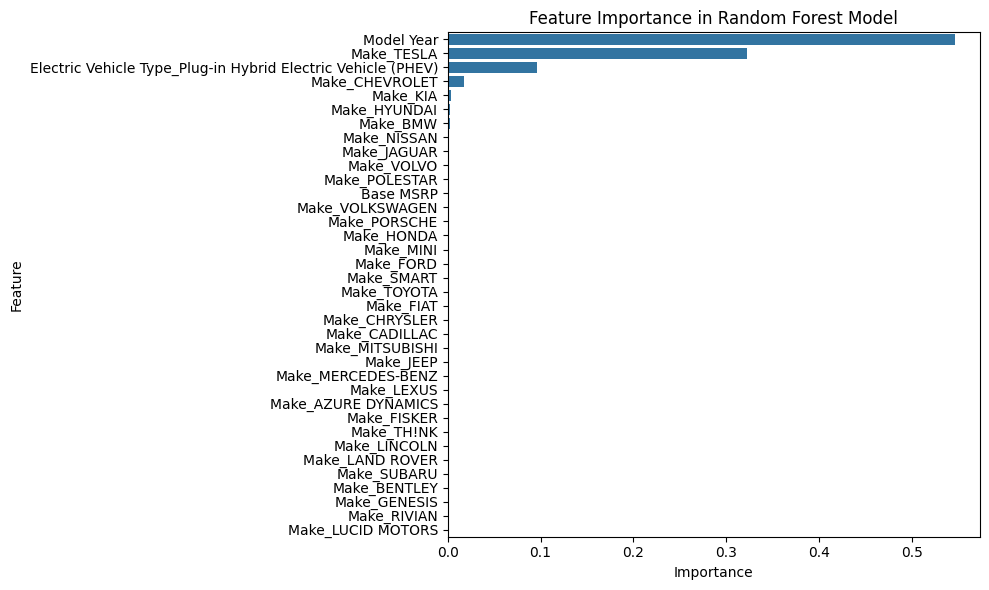

In [57]:
impotance = best_rf_model.feature_importances_
feature_names = x_train.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': impotance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [58]:
import pickle

pickle.dump(best_rf_model, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))
